# Batch creation of Groups

This sample notebook automates the task of creating groups in an ArcGIS Portal or ArcGIS Online Org. A similar task can be done for creating or updating users and content.

In [1]:
from arcgis.gis import *
from IPython.display import display
import pandas as pd

The list of groups to be created in read from a csv file, along with the properties and thumbnails to be used for creating the groups. Such a file can be created using Excel.

In [2]:
groups_df = pd.read_csv('data/groups.csv')

In [3]:
groups_df[:3]

access                                        description  isFav  \
0  public  This group includes a complete list of basemap...  False   
1     org  This Group contains an inventory of map servic...  False   
2     org  A group dealing with government and industry a...  False   

  isInvitationOnly isViewOnly phone  \
0             True       True  null   
1            False      False  null   
2            False      False  null   

                                       snippet sortField sortOrder  \
0     Standard basemaps for our organizations.     title       asc   
1        The authoritative service catalog.        title       asc   
2  Regulatory compliance tracking & reporting.  modified       asc   

                         tags            thumbnail             title  
0  Maps,Base,Basemap,Basemaps         Basemaps.png          Basemaps  
1          Services,Maps,Data  CentralServices.png  Central Services  
2       Regulatory,Compliance    RegCompliance.png        Compliance

 The thumbnails are extracted from a zip file (Icons.zip) 

In [4]:
import zipfile
with zipfile.ZipFile("data/Icons.zip") as z:
    z.extractall("data")

Using Jupyter Notebooks' 'magic functions' that you can call with a command line style syntax, it's easy to change the directory to the folder containing the extracted icons:

In [5]:
%cd data/Icons

C:\arcgis-python-api\samples\03 Org Administrators\data\Icons


The code below reads the csv file line by line, and creates a group in the GIS using the specified parameters and thumbnail:

In [6]:
import csv

gis = GIS("https://dev04875.esri.com/arcgis", "portaladmin", "portaladmin")
groups = []
with open('..\\..\\data\\groups.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        group = gis.groups.create_from_dict(row)
        groups.append(group)
        

To verify, can can display the created groups:

<Group title:"Basemaps" owner:portaladmin>
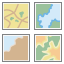

<Group title:"Central Services" owner:portaladmin>
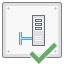

<Group title:"Compliance" owner:portaladmin>
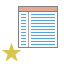

<Group title:"Customer Service, Finance, Billing and Accounting" owner:portaladmin>
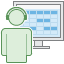

<Group title:"Demographic Content" owner:portaladmin>
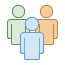

<Group title:"Design and Engineering" owner:portaladmin>
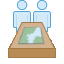

<Group title:"Disaster Response" owner:portaladmin>
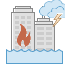

<Group title:"Executive Reports" owner:portaladmin>
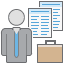

<Group title:"External Contractors" owner:portaladmin>
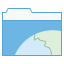

<Group title:"Featured Apps" owner:portaladmin>
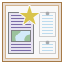

<Group title:"Field and Facility Maintenance" owner:portaladmin>
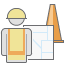

<Group title:"Fire Service" owner:portaladmin>
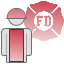

<Group title:"Gallery" owner:portaladmin>
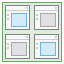

<Group title:"Industrial Monitoring" owner:portaladmin>
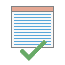

<Group title:"Lab Services" owner:portaladmin>
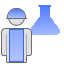

<Group title:"Land Use Content" owner:portaladmin>
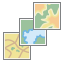

<Group title:"Network Operations" owner:portaladmin>
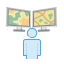

<Group title:"Public Maps and Apps" owner:portaladmin>
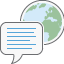

<Group title:"Tools and Add-Ins" owner:portaladmin>
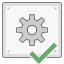

<Group title:"Wastewater Treatment" owner:portaladmin>
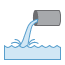

<Group title:"Water Treatment" owner:portaladmin>
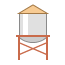

<Group title:"Web App Templates" owner:portaladmin>
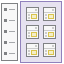

In [7]:
for g in groups:
    display(g)